In [ ]:
import pandas as pd    #Importing necessary modules
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# =========================
# Loading data into dataframe
# =========================
from dotenv import load_dotenv
import os
load_dotenv()
data_path = os.getenv("PATH")
df = pd.read_csv(data_path, index_col="PassengerId") 

In [ ]:
print(df)  #Printing overall dataset

             Survived                        Pclass  \
PassengerId                                           
1                   0                             3   
2                   1                             1   
3                   1                             3   
4                   1                             1   
5                   0                             3   
...               ...                           ...   
1305                3            Spector, Mr. Woolf   
1306                1  Oliva y Ocana, Dona. Fermina   
1307                3  Saether, Mr. Simon Sivertsen   
1308                3           Ware, Mr. Frederick   
1309                3      Peter, Master. Michael J   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Flo

In [ ]:
df.head()  #First 5 elements of dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [ ]:
df.isnull().sum()  #Printing counts of missing values in a dataframe

Survived      0
Pclass        0
Name          0
Sex          86
Age         177
SibSp         0
Parch         0
Ticket        1
Fare        327
Cabin       687
Embarked    420
dtype: int64

In [ ]:
# Handling missing age  values 
df["Age"] = df["Age"].fillna(df["Age"].mean())  # replacing age with mean 

In [ ]:
# Handling missing values in Cabin 
df["Deck"] = df["Cabin"].str[0]   # Extracting first character of cabin like c35-> c etc   
df["Deck"] = df["Deck"].fillna("Missing")  #  filling N/A with missing
df.drop(columns=["Cabin"],inplace=True) #  Drop original cabin column
print(df.head())

             Survived Pclass  \
PassengerId                    
1                   0      3   
2                   1      1   
3                   1      3   
4                   1      1   
5                   0      3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp Parch            Ticket     Fare Embarked     Deck  
PassengerId                                                            
1                1     0         A/5 21171     7.25        S  Missing 

In [ ]:
# Handling missing values in Embarked column 
df.dropna(subset=["Embarked"],inplace=True)  # Dropping the two rows 
# alternatively you can also fill them with mode = df["Embarked"].fillna(df["Embarked"].mode[0] , inplace = True)

In [ ]:

df["Fare"] = pd.to_numeric(df["Fare"],errors="coerce")  # AS fare is a string column we convert it to numeric datatype  errors = coerce means convert/eplace invalid strings to None
df["Fare"].fillna(df["Fare"].median(), inplace=True)  # filling missing values of fare with median

df["Sex"].fillna(df["Sex"].mode()[0], inplace=True)  # replacing with mode
df.dropna(subset=["Ticket"],inplace=True)  # dropping the row


C:\Users\NINAD\AppData\Local\Temp\ipykernel_2552\2886034980.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Fare"].fillna(df["Fare"].median(), inplace=True)  # filling missing values of fare with median
C:\Users\NINAD\AppData\Local\Temp\ipykernel_2552\2886034980.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

In [ ]:
# Performing Label Encoding on copy of df
df_copy = df.copy()

le = LabelEncoder() # Creating object of LabelEncoder

df_copy["Sex_encoded"] = le.fit_transform(df_copy["Sex"])  # using label encoder male -> 1 , female -> 0
df_copy.drop(columns=["Sex"],inplace=True)  # drop the original col of Sex with Sex_encoded
df_copy.head()


,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Sex_encoded
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,Missing,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,C,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,Missing,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,C,0
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,Missing,1


In [ ]:
# Performing ONE - Hot encoding on copy of df

df_copy = pd.get_dummies(df_copy,columns=["Embarked"],drop_first=True) # Creates three cols Embarked_C Embarked_S Embarked_Q  we will drop first col

bool_cols = df_copy.select_dtypes(include="bool").columns  # selecting all boolean columns from df_copy
df_copy[bool_cols] = df_copy[bool_cols].astype(int)  # converting the data type to int using astype()


df_copy.head()


,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Deck,Sex_encoded,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Missing,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0,0,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Missing,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C,0,0,1
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Missing,1,0,1


In [ ]:
# Performing OneHotEncoding using One Hot Encoder
# Create a OneHotEncoder object from sklearn
'''
ohe = OneHotEncoder(
    drop="first",          # Drops the first category to avoid the dummy variable trap (multicollinearity)
    sparse_output=False    # Returns a NumPy array instead of a sparse matrix
)

# Apply one-hot encoding on the 'Embarked' column
embarked_encoded = ohe.fit_transform(df_copy[["Embarked"]])
# fit_transform:
# 1. Learns unique categories in 'Embarked'
# 2. Converts them into binary (0/1) columns

# Get the names of the newly created encoded columns
encoded_cols = ohe.get_feature_names_out(["Embarked"])
# Example output: ['Embarked_Q', 'Embarked_S'] (since drop='first')

# Convert the encoded NumPy array into a pandas DataFrame
embarked_df = pd.DataFrame(
    embarked_encoded,      # Encoded values
    columns=encoded_cols,  # Column names from encoder
    index=df_copy.index    # Keep same index to align rows correctly
)

# Concatenate the encoded columns with the original DataFrame
df_copy = pd.concat([df_copy, embarked_df], axis=1)

# Drop the original 'Embarked' column since it is now encoded
df_copy.drop(columns=['Embarked'], inplace=True)  '''


'\nohe = OneHotEncoder(\n    drop="first",          # Drops the first category to avoid the dummy variable trap (multicollinearity)\n    sparse_output=False    # Returns a NumPy array instead of a sparse matrix\n)\n\n# Apply one-hot encoding on the \'Embarked\' column\nembarked_encoded = ohe.fit_transform(df_copy[["Embarked"]])\n# fit_transform:\n# 1. Learns unique categories in \'Embarked\'\n# 2. Converts them into binary (0/1) columns\n\n# Get the names of the newly created encoded columns\nencoded_cols = ohe.get_feature_names_out(["Embarked"])\n# Example output: [\'Embarked_Q\', \'Embarked_S\'] (since drop=\'first\')\n\n# Convert the encoded NumPy array into a pandas DataFrame\nembarked_df = pd.DataFrame(\n    embarked_encoded,      # Encoded values\n    columns=encoded_cols,  # Column names from encoder\n    index=df_copy.index    # Keep same index to align rows correctly\n)\n\n# Concatenate the encoded columns with the original DataFrame\ndf_copy = pd.concat([df_copy, embarked_df]

In [ ]:
X = df_copy[["Pclass","Age","SibSp","Parch","Fare","Sex_encoded","Embarked_Q","Embarked_S"]]  # Input should have only necessary numeric values
y = df_copy[["Survived"]]  # Output

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)  # splitting training and testing data

In [ ]:

standard_scaler = StandardScaler()  # creating a object of stndard scaler
X_train[["Age","Fare"]] = standard_scaler.fit_transform(X_train[["Age","Fare"]])  # On training dataframe use fit_transform while on testing use tranform only because its testing data
X_test[["Age","Fare"]] = standard_scaler.transform(X_test[["Age","Fare"]])        # scaling the numerical values of Age and Fare at mean = 0 and std = 1
                                                                                  # [[]] used as dataframe is 2D 

In [ ]:
model = LinearRegression()  # Creating a instance of Linear Regression model
model.fit(X_train,y_train)  # Training the model 

model_predictions = (model.predict(X_test) >= 0.5).astype(int) # model predicts a value and check the threshold value >= 0.5 returns true/false tehn we convert it into 0/1 

print(model_predictions) # printing the predictions

mae = mean_absolute_error(y_test, model_predictions)  # calculating mae and r2 score and then printing it.
r2 = r2_score(y_test, model_predictions)


print("MAE  of model is :",mae)
print("R2 score of model :",r2)

[[0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]]
MAE  of model is : 0.21910112359550563
R2 score of model : 0.07698444355803769


In [ ]:
# Actual values
y_actual = y_test.values.ravel()  # y_test has a shape of (n,1) .values converts it into numpy array then .ravel flattens the array ie. 2D -> 1D [[1],[2],[3]] -> [1,2,3]
 
model_predictions = model_predictions.ravel()

# Create comparison dataframe of Actual v/s Predicted
comparison_df = pd.DataFrame({
    "Actual": y_actual,
    "Predicted": model_predictions
})

comparison_df.head(10)


,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
5,1,0
6,0,0
7,0,0
8,1,1
9,1,1


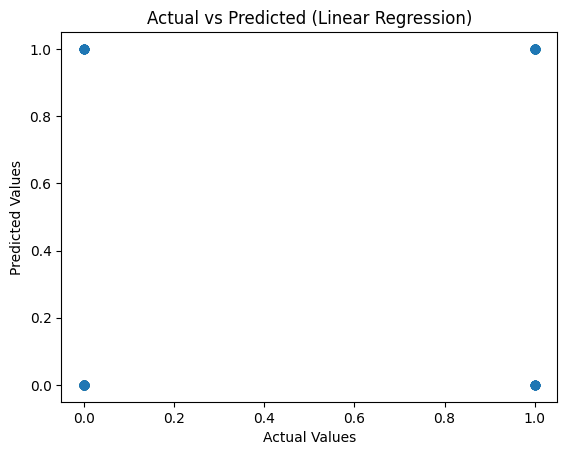

In [ ]:
# creating a scatter plot
plt.scatter(y_actual,model_predictions,alpha=0.6) # alpha is for opaqueness of dots points are overlapping
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()

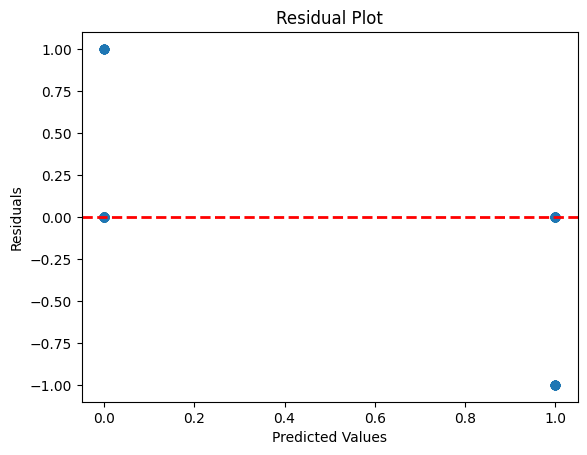

In [ ]:
# Residual plot 
residuals = y_actual - model_predictions

plt.scatter(model_predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2) # axis horizontal line at y = 0
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

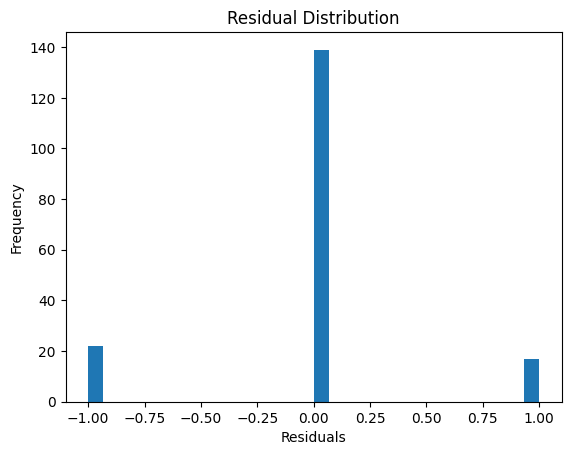

In [ ]:
# creating a histogram
plt.hist(residuals,bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

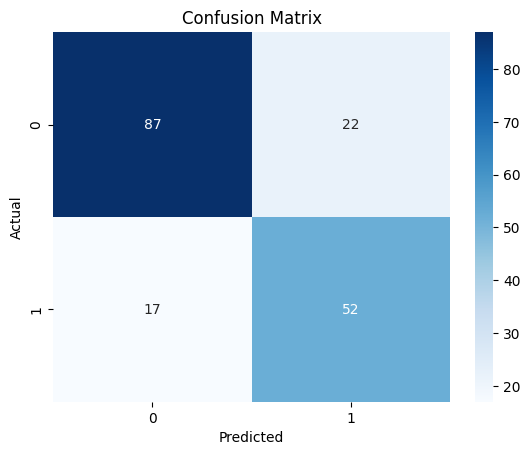

In [ ]:
# confusion matrix 
# helpful to display TP,FP,FN,TN
cm = confusion_matrix(y_actual,model_predictions)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") # annot -> Displays the actual numbers inside each cell , fmt  => format of integer
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:

# -------------------------------
# Take user input
# -------------------------------
print("Enter Passenger Details:")

Pclass = int(input("Pclass (1, 2, 3): "))
Age = float(input("Age: "))
SibSp = int(input("Number of siblings/spouses aboard: "))
Parch = int(input("Number of parents/children aboard: "))
Fare = float(input("Fare: "))

Sex = input("Sex (male/female): ").lower()
Embarked = input("Embarked (S/C/Q): ").upper()

# -------------------------------
#  Encode inputs (same logic as training)
# -------------------------------
Sex_encoded = 1 if Sex == "male" else 0

Embarked_Q = 1 if Embarked == "Q" else 0
Embarked_S = 1 if Embarked == "S" else 0
# Embarked_C is dropped (drop_first=True)

# -------------------------------
#  Create DataFrame
# -------------------------------
new_input = pd.DataFrame([{
    "Pclass": Pclass,
    "Age": Age,
    "SibSp": SibSp,
    "Parch": Parch,
    "Fare": Fare,
    "Sex_encoded": Sex_encoded,
    "Embarked_Q": Embarked_Q,
    "Embarked_S": Embarked_S
}])

print("\nInput Data:")
print(new_input)

# -------------------------------
#  Scale numerical features
# -------------------------------
new_input[["Age", "Fare"]] = standard_scaler.transform(
    new_input[["Age", "Fare"]]
)

# -------------------------------
#  Predict using Linear Regression
# -------------------------------
prediction = model.predict(new_input)

# Convert to class (0 or 1)
predicted_class = (prediction >= 0.5).astype(int)

# -------------------------------
#  Output result
# -------------------------------
print("\nPrediction Result:")
print("Predicted value:", prediction[0])

if predicted_class[0] == 1:
    print("Passenger is likely to SURVIVE ✅")
else:
    print("Passenger is likely to NOT SURVIVE ❌")


Enter Passenger Details:

Input Data:
   Pclass   Age  SibSp  Parch    Fare  Sex_encoded  Embarked_Q  Embarked_S
0       2  25.0      5      4  1523.0            1           0           1

Prediction Result:
Predicted value: [0.32735917]
Passenger is likely to NOT SURVIVE ❌
